In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot

In [2]:
df = pd.read_table("low_freq/house_6/channel_8.dat", sep="\s+" )
df.head()

,1306006763,0.00
0,1306006787,1.0
1,1306006791,1.0
2,1306006794,0.0
3,1306006797,0.0
4,1306006800,0.0


In [3]:
df.columns = ["time","consumption"]
df.head()

,time,consumption
0,1306006787,1.0
1,1306006791,1.0
2,1306006794,0.0
3,1306006797,0.0
4,1306006800,0.0


In [4]:
df['time'] = pd.to_datetime(df['time'],unit='s')
df.head()

,time,consumption
0,2011-05-21 19:39:47,1.0
1,2011-05-21 19:39:51,1.0
2,2011-05-21 19:39:54,0.0
3,2011-05-21 19:39:57,0.0
4,2011-05-21 19:40:00,0.0


In [5]:
##sorting by time
df.index= [d for d in df.time]
df = df.sort_index()
df.reset_index(drop=True, inplace=True)
df.head()

,time,consumption
0,2011-05-21 19:39:47,1.0
1,2011-05-21 19:39:51,1.0
2,2011-05-21 19:39:54,0.0
3,2011-05-21 19:39:57,0.0
4,2011-05-21 19:40:00,0.0


<AxesSubplot:xlabel='time'>

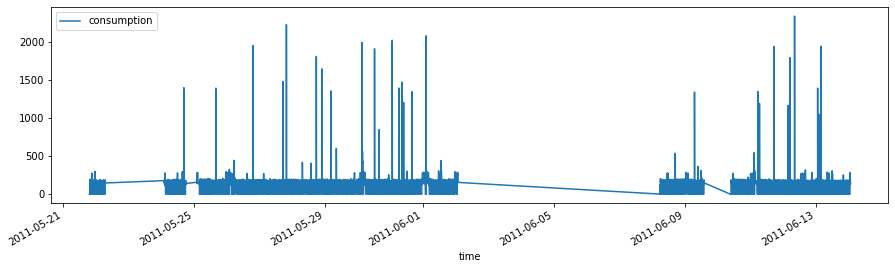

In [9]:
df.plot(x="time",y=['consumption'], figsize=(15,4))

<AxesSubplot:xlabel='time'>

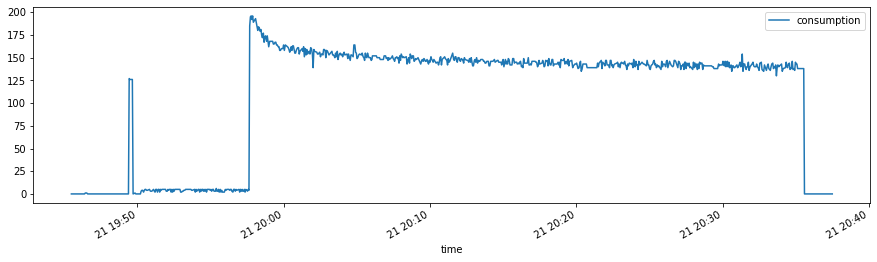

In [6]:
#df.loc[pd.to_datetime("2011-05-29")].plot(x='time',y='consumption',figsize=(15,4))
df.iloc[100:1000].plot(x='time',y='consumption',figsize=(15,4))

In [49]:
#getting the time difference and adding it as a column 
timediff=[0]
date=df.time[0]
print(date)
for d in df.time[1:] :
    timediff.append((d-date).seconds+(d-date).days*24*60*60) 
    date=d
df['timediff']=timediff
df.head()

2011-05-21 19:39:47


0         0
1         4
2         3
3         3
4         3
         ..
376962    3
376963    3
376964    2
376965    8
376966    3
Name: timediff, Length: 376967, dtype: int64

In [50]:
df.to_csv("fridge_power_consumption", index = False)

In [56]:
new_index=[0]
for index, row in df.iterrows():
    if row["timediff"]>20:
        print(index,row["time"])
        new_index.append(index)
new_index.append(len(df.index)-1)

12159 2011-05-24 02:16:29
29097 2011-05-25 02:24:57
227488 2011-06-08 05:53:16
267614 2011-06-10 09:07:31
341015 2011-06-12 20:21:25


IndexError: list index out of range

In [74]:
datasets_house_6=[]
for i in range(len(new_index)-1):
    datasets_house_6.append(df[new_index[i]:new_index[i+1]])
len(datasets_house_6)

6

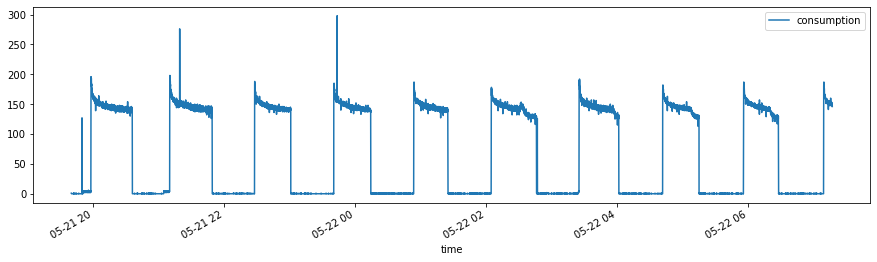

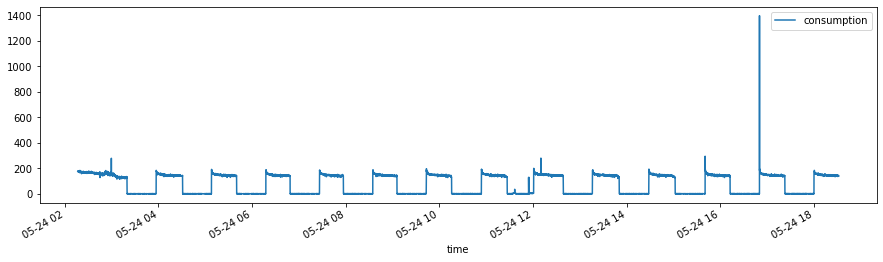

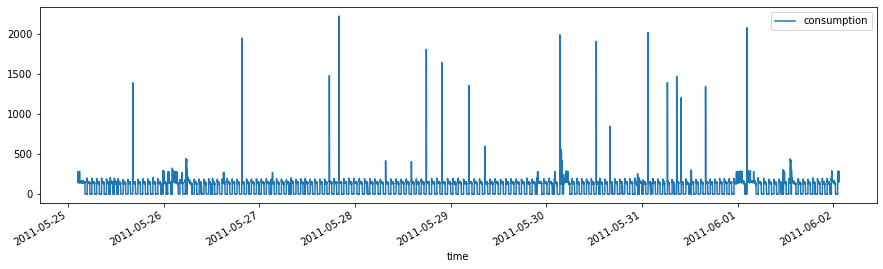

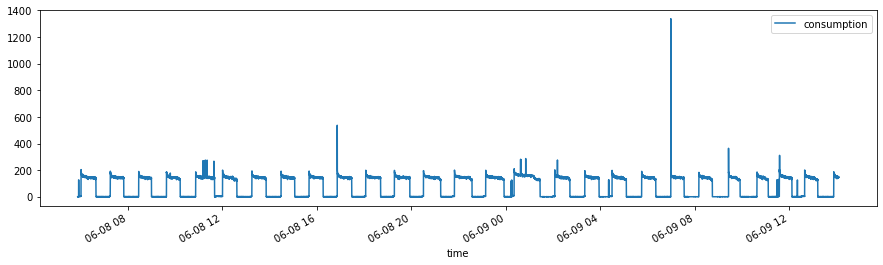

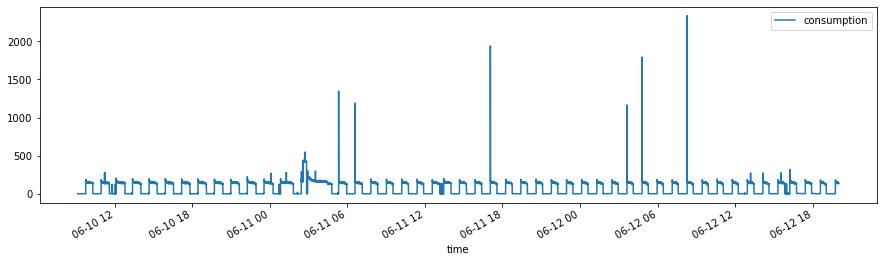

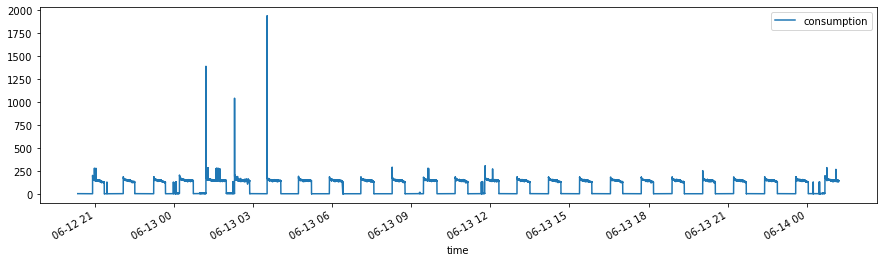

In [75]:
for dataset in datasets_house_6:
    dataset.plot(x="time",y=['consumption'], figsize=(15,4))

In [90]:
##resampling at 1 second rate 
dataset_house_6_resampled=[]

for dataset in datasets_house_6:
    newdataset=dataset.drop(columns="timediff")
    
    newdataset.index=[d for d in newdataset.time]
    newdataset=newdataset.resample('1S').ffill()
    
    #newdataset.time=newdataset.index
    newdataset.reset_index(drop=True, inplace=True)
    
    dataset_house_6_resampled.append(newdataset)
    
for dataset in dataset_house_6_resampled:
    print(dataset.head())
    

                 time  consumption
0 2011-05-21 19:39:47          1.0
1 2011-05-21 19:39:48          1.0
2 2011-05-21 19:39:49          1.0
3 2011-05-21 19:39:50          1.0
4 2011-05-21 19:39:51          1.0
                 time  consumption
0 2011-05-24 02:16:29        176.0
1 2011-05-24 02:16:30        176.0
2 2011-05-24 02:16:31        176.0
3 2011-05-24 02:16:32        177.0
4 2011-05-24 02:16:33        177.0
                 time  consumption
0 2011-05-25 02:24:57        157.0
1 2011-05-25 02:24:58        157.0
2 2011-05-25 02:24:59        157.0
3 2011-05-25 02:25:00        279.0
4 2011-05-25 02:25:01        279.0
                 time  consumption
0 2011-06-08 05:53:16          0.0
1 2011-06-08 05:53:17          0.0
2 2011-06-08 05:53:18          0.0
3 2011-06-08 05:53:19          1.0
4 2011-06-08 05:53:20          1.0
                 time  consumption
0 2011-06-10 09:07:31          0.0
1 2011-06-10 09:07:32          0.0
2 2011-06-10 09:07:33          0.0
3 2011-06-10 09:07:3

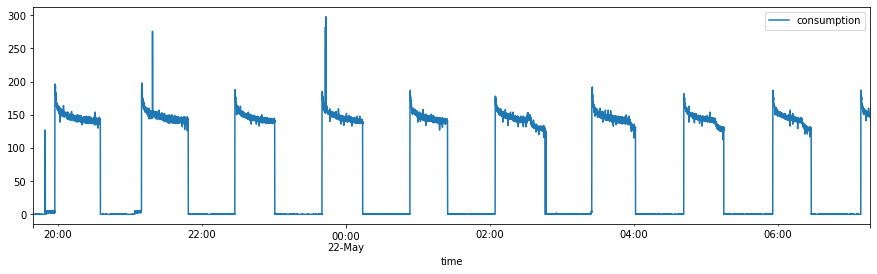

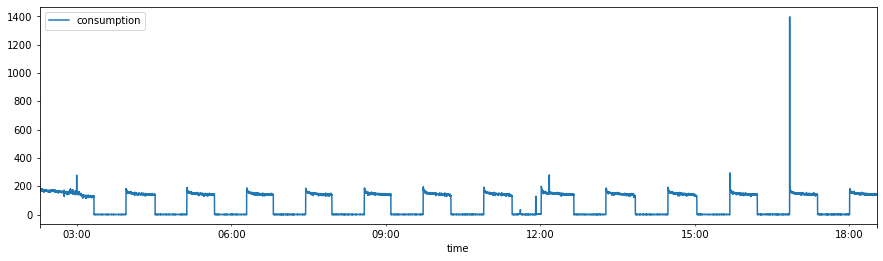

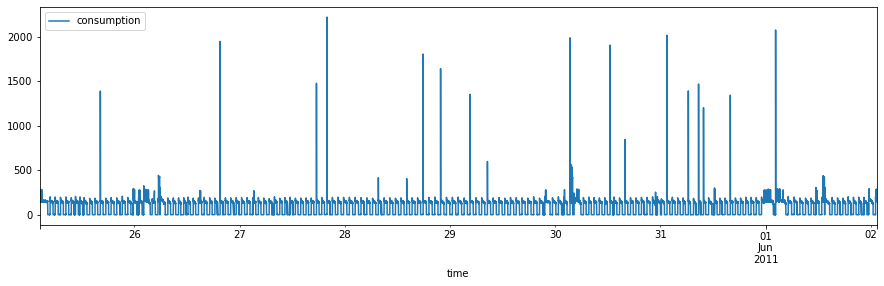

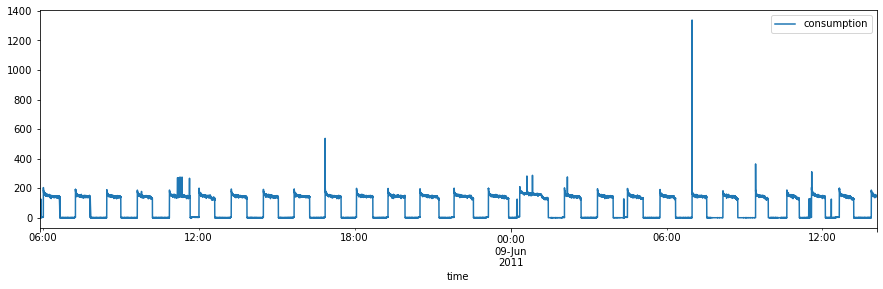

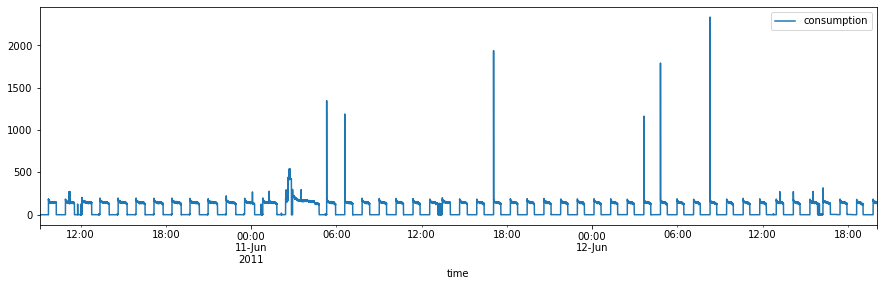

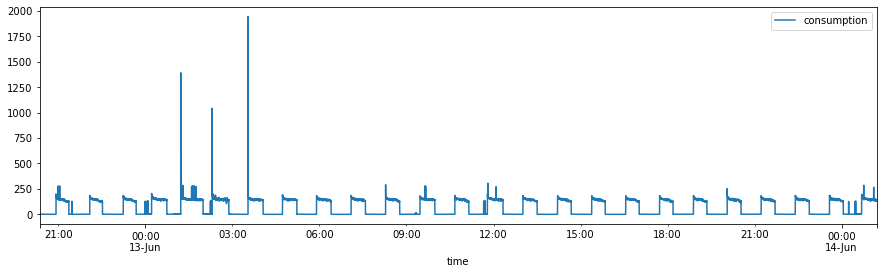

In [92]:
for dataset in dataset_house_6_resampled:
    dataset.plot(x="time",y=['consumption'], figsize=(15,4))

In [98]:
i=0
for dataset in dataset_house_6_resampled:
    dataset.to_csv("datasets_ready_to_go/redd_house_6"+str(i), index = False)
    i+=1